# Esse projeto visa estudar utilizando como base o livro "Projetos de Ciência de Dados com Python"

In [1]:
## bibliotecas iniciais

import pandas as pd
import numpy as np

In [2]:
## leitura dos dados

dados = pd.read_excel(r"C:\Users\pasch\Desktop\CURSOS\LIVRO_PROJETOS_C_DADOS_PYTHON\Projeto\default_of_credit_card_clients__courseware_version_1_21_19.xls")

print(f'O dataset contém {dados.shape[0]} linhas e {dados.shape[1]} colunas')
dados.head()

O dataset contém 30000 linhas e 25 colunas


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Dicionário dos Dados

In [3]:
print(f'O dataset contém {dados.shape[0]} linhas e {dados.shape[1]} colunas')

O dataset contém 30000 linhas e 25 colunas


### Checando ID's únicos

In [4]:
dados['ID'].nunique()

29687

Ou seja, de 30.000 linhas, temos 29.687 ID's únicos, temos então ID's que se repetem.

In [5]:
duplicados = dados['ID'].value_counts()

duplicados.value_counts()

count
1    29374
2      313
Name: count, dtype: int64

### Verificando a integridade com Máscaras Booleanas

In [6]:
dupe_mask = duplicados == 2

dupe_mask[:5]

ID
ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
Name: count, dtype: bool

In [7]:
dupe_ids = duplicados.index[dupe_mask]

dupe_ids = list(dupe_ids)
len(dupe_ids)

313

### Checando mais a fundo as duplicadas

In [8]:
dados.loc[dados['ID'].isin(dupe_ids[0:3]),:].head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1


Ou seja, olhando dentro do dataset geral e procurando apenas os 3 primeiros dados com ID's duplicados, já conseguimos verificar que ocorre algum problema, há dados com linhas contendo apenas 0.

### Criando uma segunda Máscara Booleana - Dataset

In [9]:
dados_mask_zero = dados == 0

In [10]:
feature_zero_mask = dados_mask_zero.iloc[:,1:].all(axis=1)

sum(feature_zero_mask)

315

### Excluindo as duplicadas

In [11]:
df_clean_1 = dados.loc[~feature_zero_mask,:].copy()

df_clean_1.shape

(29685, 25)

In [12]:
## checando se ficamos apenas com dados únicos

df_clean_1['ID'].nunique()

29685

In [13]:
## verificando os dados com mais detalhes

df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  int64 


Interessante notar que temos a coluna 'PAY_1' como string, vamos olhar ela mais detalhadamente

In [14]:
df_clean_1['PAY_1'].value_counts()

PAY_1
0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: count, dtype: int64

### Linha com "Not available"

In [15]:
valid_pay_1 = df_clean_1['PAY_1'] != 'Not available'

In [16]:
sum(valid_pay_1)

26664

In [17]:
## limpeza dos dados

df_clean_2 = df_clean_1.loc[valid_pay_1, :].copy()

df_clean_2.shape

(26664, 25)

In [18]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  object
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  int64 


In [19]:
## alterando o tipo da coluna

df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')

### Análise detalhada de algumas colunas

In [20]:
## importando biblioteca

import matplotlib.pyplot as plt
import matplotlib as mtl

%matplotlib inline

array([[<Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'AGE'}>]], dtype=object)

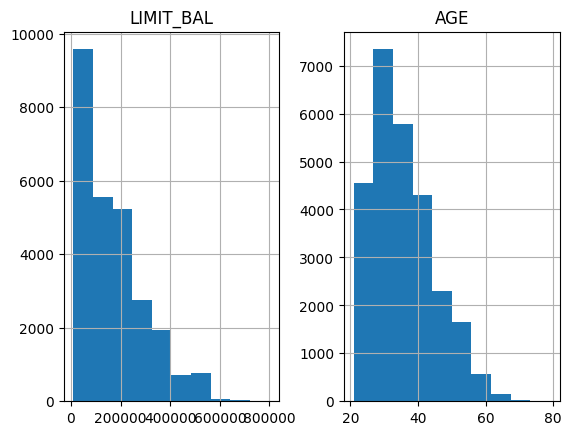

In [21]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [22]:
## checando alguns dados estatisticos

df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [23]:
## checando educação

df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: count, dtype: int64

Os valores '0', '5' e '6' não estão documentados, por isso serão agrupados junto ao '4'

In [24]:
df_clean_2['EDUCATION'].replace(to_replace=[0,5,6], value=4, inplace=True)

df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64

In [25]:
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      286
0       48
Name: count, dtype: int64

O valor '0' aqui também não está documentado, logo será então agrupado junto ao '3'

In [26]:
df_clean_2['MARRIAGE'].replace(to_replace=[0], value=3, inplace=True)

df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      334
Name: count, dtype: int64

### Implementando One Hot Encoding na coluna EDUCATION

In [27]:
df_clean_2['EDUCATION_CAT'] = 'none'

In [28]:
## checando as duas colunas de educação

df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head()

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none


In [29]:
## criando um map para categorizar a coluna de acordo com a EDUCATION original

cat_map = {
    1: 'graduate school',
    2: 'university',
    3: 'high school',
    4: 'others'
}

df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_map)

df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head()

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university


In [30]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'], dtype=int)

edu_ohe.head()

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [31]:
edu_ohe.columns

Index(['graduate school', 'high school', 'others', 'university'], dtype='object')

In [32]:
data_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)

data_ohe[['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']].head()

,EDUCATION_CAT,graduate school,high school,others,university
0,university,0,0,0,1
1,university,0,0,0,1
2,university,0,0,0,1
3,university,0,0,0,1
4,university,0,0,0,1


In [33]:
## Verificando as colunas de pagamento

data_ohe.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [39]:
pay_data = [ 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [41]:
pay_data

['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

<Axes: >

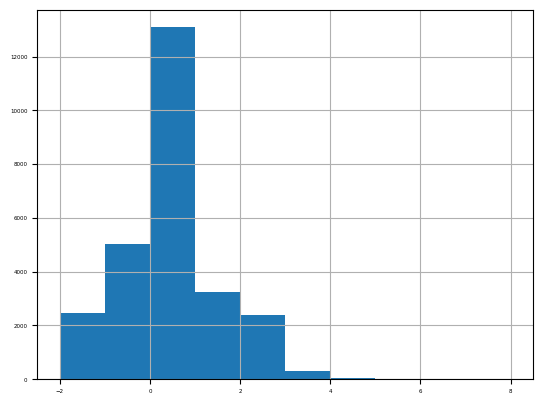

In [42]:
data_ohe[pay_data[0]].hist()

In [43]:
## bins

pay_bins = np.array(range(-2,10)) -0.5

pay_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

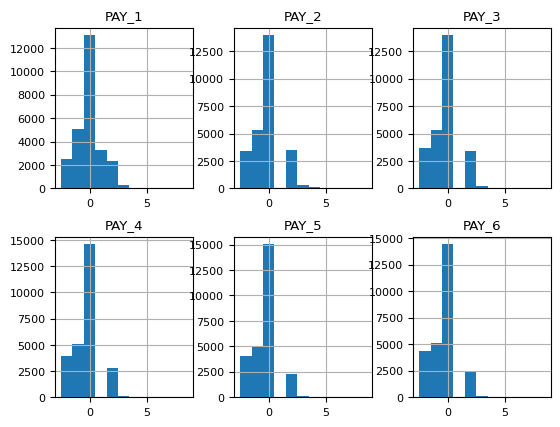

In [46]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 8
data_ohe[pay_data].hist(bins=pay_bins, layout=(2,3));

In [47]:
data_ohe.loc[data_ohe['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
50,2,2


## Salvando a Base e encerrando Cap. 1

In [48]:
data_ohe.to_csv(r"C:\Users\pasch\Desktop\CURSOS\LIVRO_PROJETOS_C_DADOS_PYTHON\Projeto\cap1_data_limpo.csv", index=False)